# Exploratory Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/Practice')
os.getcwd()

'/content/drive/My Drive/Practice'

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sn
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

df = pd.read_csv('./data.csv')

In [ ]:
df.head(20)

,Starting Year,Student Identifier,MS/PhD or PhD,Billing_Program,gender,US_Citz/PR_Status,Visa_Type,ipeds_long_name,Years Registered,Graduation_Date
0,2004,Student 181,PhD,Program 2,M,N,F1,NRA,5.0,2009-10-21
1,2009,Student 3,MS/PhD,Program 2,M,N,F1,NRA,5.0,2014-05-21
2,2009,Student 6,MS/PhD,Program 2,M,N,NI,NRA,4.5,2015-02-11
3,2009,Student 8,MS/PhD,Program 2,F,N,F1,NRA,5.0,2014-10-15
4,2015,Student 74,PhD,Program 2,M,N,F1,NRA,4.0,2019-05-22
5,2020,Student 129,MS/PhD,Program 2,M,N,Z1,NRA,0.5,NaN
6,2017,Student 88,MS/PhD,Program 2,M,N,F1,NRA,3.5,NaN
7,2013,Student 42,PhD,Program 1,M,N,F1,NRA,5.5,2020-05-20
8,2014,Student 48,MS/PhD,Program 2,M,N,F1,NRA,1.0,NaN
9,2013,Student 46,PhD,Program 2,M,N,F1,NRA,4.0,2017-10-18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Starting Year       50 non-null     int64  
 1   Student Identifier  50 non-null     object 
 2   MS/PhD or PhD       50 non-null     object 
 3   Billing_Program     50 non-null     object 
 4   gender              50 non-null     object 
 5   US_Citz/PR_Status   50 non-null     object 
 6   Visa_Type           49 non-null     object 
 7   ipeds_long_name     50 non-null     object 
 8   Years Registered    50 non-null     float64
 9   Graduation_Date     31 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.0+ KB


In [ ]:
#add a column named 'Graduated' to indicate whether a student has graduated. Yes - graduated, No - otherwise
#assuming students w/o graduation dates are not on LOA

df['Graduated'] = ['No' if df.Graduation_Date.isna()[i] else 'Yes' for i in range(df.Graduation_Date.shape[0])]

In [ ]:
#rename some of the columns for convenience

df.rename(columns = {'MS/PhD or PhD':'Program', 'ipeds_long_name':'Ethnicity'}, inplace = True)
df['Ethnicity'] = df['Ethnicity'].apply(lambda x: 'Other' if x == 'NRA' else x)

In [ ]:
#categorical variables and their values excluding student identifier and graduation date

col_names = df.columns.to_list()

cat_factors = list(col_name for col_name in col_names if df[col_name].dtype == 'object')

for factor in cat_factors:
  if factor == 'Student Identifier' or factor =='Graduation_Date':
    continue
  print(f'{factor}: {df[factor].unique()}')

Program: ['PhD' 'MS/PhD']
Billing_Program: ['Program 2' 'Program 1']
gender: ['M' 'F']
US_Citz/PR_Status: ['N' 'Y']
Visa_Type: ['F1' 'NI' 'Z1' 'PR' 'C ' nan 'J1']
Ethnicity: ['Other' 'White' 'Asian']
Graduated: ['Yes' 'No']


In [ ]:
datetime(2020,1,1).date()

datetime.date(2020, 1, 1)

In [ ]:
#change starting year and years registered to datetime format

df['Starting Year'] = df['Starting Year'].apply(lambda x: datetime(x,1,1).date())

In [ ]:
#sort data by starting year, reset index, drop old indexes

df.sort_values('Starting Year', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(20)

,Starting Year,Student Identifier,Program,Billing_Program,gender,US_Citz/PR_Status,Visa_Type,Ethnicity,Years Registered,Graduation_Date,Graduated
0,2020-01-01,Student 126,MS/PhD,Program 2,M,N,Z1,Other,0.5,NaN,No
1,2020-01-01,Student 132,PhD,Program 2,M,N,Z1,Other,0.5,NaN,No
2,2020-01-01,Student 129,MS/PhD,Program 2,M,N,Z1,Other,0.5,NaN,No
3,2020-01-01,Student 135,PhD,Program 2,M,N,F1,Other,0.5,NaN,No
4,2020-01-01,Student 134,PhD,Program 2,M,N,F1,Other,0.5,NaN,No
5,2019-01-01,Student 120,PhD,Program 2,M,N,F1,Other,1.5,NaN,No
6,2018-01-01,Student 102,MS/PhD,Program 2,M,N,F1,Other,2.5,NaN,No
7,2018-01-01,Student 103,MS/PhD,Program 2,F,N,F1,Other,2.5,NaN,No
8,2018-01-01,Student 113,PhD,Program 2,M,N,F1,Other,2.5,NaN,No
9,2017-01-01,Student 91,MS/PhD,Program 2,M,Y,C,White,3.5,NaN,No


MS/PhD:
count    28.000000
mean      4.107143
std       1.765708
min       0.500000
25%       3.500000
50%       5.000000
75%       5.000000
max       7.000000
Name: Years Registered, dtype: float64

PhD:
count    22.000000
mean      3.977273
std       1.861114
min       0.500000
25%       3.000000
50%       5.000000
75%       5.000000
max       6.000000
Name: Years Registered, dtype: float64



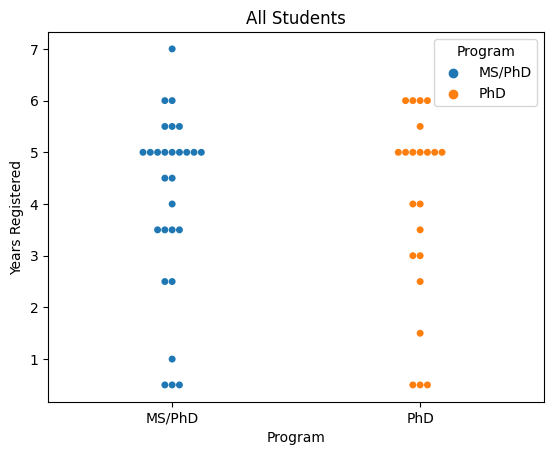

In [ ]:
#how long do students usually stay in each program, regardless of completion?

df_gb_programs = df.groupby('Program')
for group,ind in df_gb_programs.groups.items():
  print(f"{group}:\n{df_gb_programs.get_group(group)['Years Registered'].describe()}\n")

#illustrate summary stats in one graph
sn.swarmplot(x=df.Program, y=df['Years Registered'], hue=df.Program)
plt.title('All Students')
plt.show()

In [ ]:
#seems like there is a pattern among recent students without graduation dates. they might be impacted by covid
#The World Health Organization (WHO) declared the outbreak a public health emergency of international concern on 30 January 2020, and a pandemic on 11 March 2020.

covid_start_date = pd.to_datetime('2020-1-30',format='%Y-%m-%d').date()
covid_start_date

datetime.date(2020, 1, 30)

In [ ]:
#if covid happended during a student's study, then it might be an influencing factor
#add stop_time column to reflect when a student completed a program or stopped registering for classes
#add a covid column to include the covid variable

stop_date = []
covid = []

days_registered = df['Years Registered']*365

for i in range(df.shape[0]):
  graudation_date = pd.to_datetime(df['Graduation_Date'][i]).date()
  stop_date_temp =  pd.to_datetime(df['Starting Year'][i] + timedelta(days = days_registered[i])).date()

  #logic: if a student graduated, then the stop date or last date enrolled should be equal to the graduation date
  if df['Graduated'][i] == 'Yes':
    stop_date.append(graudation_date)
    covid.append(graudation_date >=covid_start_date)

  #if a student did not graduate, and if the stop date is greater than or equal to covid start date,
  #then the student's last date enrolled is for sure greater than the covid start date, even if s/he took leave of absence,
  #and so the covid factor applies
  elif stop_date_temp >= covid_start_date:
    stop_date.append(stop_date_temp)
    covid.append(True)

  #else, we cannot be sure whether the covid era overlapped with the student's study
  else:
    stop_date.append('Unknown')
    covid.append('Unknown')

df['stop_date'] = stop_date
df['Covid'] = covid

df.rename(columns = {'Covid':'Was Covid-19 present during study?'},inplace=True)

MS/PhD:
count    15.000000
mean      4.533333
std       1.619818
min       0.500000
25%       4.750000
50%       5.000000
75%       5.250000
max       6.000000
Name: Years Registered, dtype: float64

PhD:
count    14.000000
mean      4.857143
std       1.027105
min       3.000000
25%       4.250000
50%       5.000000
75%       5.750000
max       6.000000
Name: Years Registered, dtype: float64



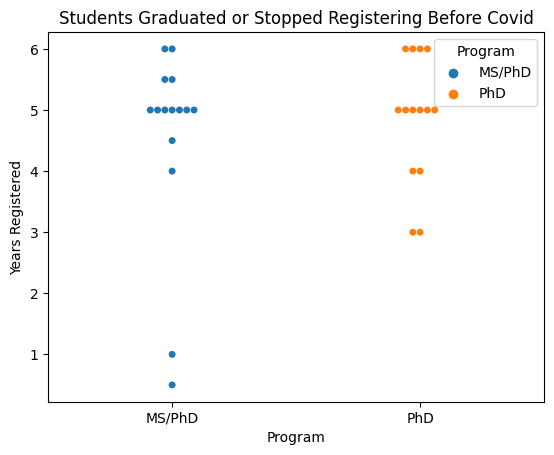

In [ ]:
#under normal circumstance (w/o presence of covid) how long do students usually stay in each program, regardless of completion?

df_new = df[df['Was Covid-19 present during study?'] != True]
df_new = df_new.reset_index(drop=True)

df_new_gb_programs = df_new.groupby('Program')
for group,ind in df_new_gb_programs.groups.items():
  print(f"{group}:\n{df_new_gb_programs.get_group(group)['Years Registered'].describe()}\n")

#illustrate summary stats in one graph
sn.swarmplot(x=df_new.Program, y=df_new['Years Registered'], hue=df_new.Program, order=['MS/PhD','PhD'], hue_order=['MS/PhD','PhD'])
plt.title('Students Graduated or Stopped Registering Before Covid')
plt.show()

MS/PhD:
count    16.000000
mean      5.218750
std       0.682367
min       4.000000
25%       5.000000
50%       5.000000
75%       5.500000
max       7.000000
Name: Years Registered, dtype: float64

PhD:
count    15.000000
mean      5.033333
std       0.854958
min       3.000000
25%       5.000000
50%       5.000000
75%       5.750000
max       6.000000
Name: Years Registered, dtype: float64



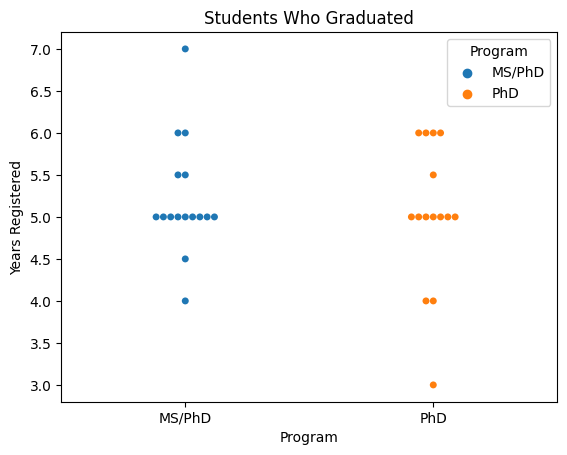

In [ ]:
#for those who graduated, how long did it take them to complete?

df_grad = df[df['Graduated'] == 'Yes']
df_grad = df_grad.reset_index(drop=True)

df_grad_gb_programs = df_grad.groupby('Program')
for group,ind in df_grad_gb_programs.groups.items():
  print(f"{group}:\n{df_grad_gb_programs.get_group(group)['Years Registered'].describe()}\n")

#illustrate summary stats in one graph
sn.swarmplot(x=df_grad.Program, y=df_grad['Years Registered'], hue=df_grad.Program)
plt.title('Students Who Graduated')
plt.show()

In [ ]:
#based on the three sets of summary statistics above, covid seemed to be related to how long a student stayed in a program
#need to run test to see if the differences are statistically significant
#run chi-square tests to see if covid is linked to program completion

contingency = pd.crosstab(df.loc[:,'Was Covid-19 present during study?'],df.loc[:,'Graduated'])

c_sta, p_value, dof, expected = chi2_contingency(contingency)
if p_value < 0.05:
  print(f'Chi-square Statistic is {c_sta}. P-value is {p_value}. Reject the null hypothesis. Covid and graduation rate are dependent.')
else:
  print(f'Chi-square Statistic is {c_sta}. P-value is {p_value}. Fail to reject the null hypothesis. Covid and graduation rate are independent.')

Chi-square Statistic is 33.83054410219096. P-value is 4.505994821918793e-08. Reject the null hypothesis. Covid and graduation rate are dependent.


In [ ]:
pd.crosstab(df.loc[:,'Was Covid-19 present during study?'],df.loc[:,'Graduated'], normalize = 'index') #Normalize by dividing all values by the sum of values. index for row, columns for columns

Graduated,No,Yes
Was Covid-19 present during study?,,
False,0.000000,1.000000
True,0.761905,0.238095
Unknown,1.000000,0.000000


In [ ]:
contingency

Graduated,No,Yes
Was Covid-19 present during study?,,
False,0,26
True,16,5
Unknown,3,0


Text(0, 0.5, 'Number of Students')

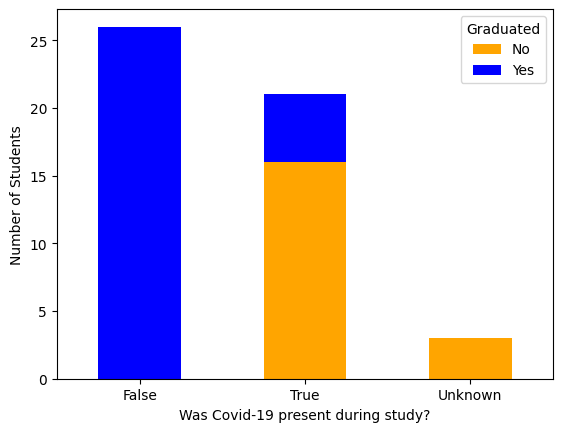

In [ ]:
#make a stacked bar graph to show the significance

contingency.plot(kind='bar',stacked=True,rot=0,color = ['orange','blue'])
plt.ylabel('Number of Students')

In [ ]:
#see if other categorical variables affect grad rate as well

#check rows that have any missing values in the columns. can drop the graduation_date column as there is already the graduated column to indicate a student completed a program or not
df.drop(columns = ['Graduation_Date'], inplace=True)
df[df.isna().sum(axis=1)!=0]

,Starting Year,Student Identifier,Program,Billing_Program,gender,US_Citz/PR_Status,Visa_Type,Ethnicity,Years Registered,Graduated,stop_date,Was Covid-19 present during study?
49,2000-01-01,Student 166,PhD,Program 2,M,Y,NaN,White,3.0,No,Unknown,Unknown


In [ ]:
#replace nan value in visa type with 'unknown'

df['Visa_Type'] = ['Unknown' if df.Visa_Type.isna()[i] else df.Visa_Type[i] for i in range(df.Visa_Type.shape[0])]
#df

In [ ]:
df.columns.to_list()

['Starting Year',
 'Student Identifier',
 'Program',
 'Billing_Program',
 'gender',
 'US_Citz/PR_Status',
 'Visa_Type',
 'Ethnicity',
 'Years Registered',
 'Graduated',
 'stop_date',
 'Was Covid-19 present during study?']

In [ ]:
#get a list of factors to run chi-square tests

num_factors = 6
factors = list(df.columns[2:2+num_factors])
factors

['Program',
 'Billing_Program',
 'gender',
 'US_Citz/PR_Status',
 'Visa_Type',
 'Ethnicity']

In [ ]:
#run chi-square tests to see if any of the categorical factors are linked to program completion

color = ['orange','blue']
for factor in factors:
  #first, take a look at the program factor
  if factor == 'Program':
    df_temp = df.loc[:,[factor,'Graduated']]
    contingency = pd.crosstab(df_temp.loc[:,factor], df_temp.loc[:,'Graduated'])
    #contingency.plot(kind='bar',stacked=True,rot=0, color = color)
    #plt.ylabel('Number of Students')
    c_sta, p_value, dof, expected = chi2_contingency(contingency)

    if p_value < 0.05:
      print(f'Contingency:\n{contingency}\n')
      print(f"Crosstab:\n{pd.crosstab(df_temp.loc[:,factor], df_temp.loc[:,'Graduated'], normalize='index')}\n")
      print(f'Expected Contingency:\n{expected}\n')
      print(f'Chi-square Statistic is {c_sta}. P-value is {p_value}. Reject the null hypothesis. {factor} and graduation rate are dependent.')

  # else:
  #   print(f'Chi-square Statistic is {c_sta}. P-value is {p_value}. Fail to reject the null hypothesis. {factor} and graduation rate are independent.')

  else:
    #then, for the other factors, separate the data by program, and then run chi square tests on each program's data
    for i in range(df.Program.nunique()):
      df_temp = df.loc[:,[factor,'Graduated']][df.Program == df.Program.unique()[i]]
      contingency = pd.crosstab(df_temp.loc[:,factor],df_temp.loc[:,'Graduated'])
      #contingency.plot(kind='bar',stacked=True,rot=0, title=f'Program: {df.Program.unique()[i]}',color = color)
      #plt.ylabel('Number of Students')
      c_sta, p_value, dof, expected = chi2_contingency(contingency)

      if p_value < 0.05:
        print(f'{df.Program.unique()[i]}\n')
        print(f'Contingency:\n{contingency}\n')
        print(f"Crosstab:\n{pd.crosstab(df_temp.loc[:,factor],df_temp.loc[:,'Graduated'], normalize='index')}\n")
        print(f'Expected Contingency:\n{expected}\n')
        print(f'Chi-square Statistic is {c_sta}. P-value is {p_value}. Reject the null hypothesis. {factor} and graduation rate are dependent.')

  #   else:
  #     print(f'Chi-square Statistic is {c_sta}. P-value is {p_value}. Fail to reject the null hypothesis. {factor} and graduation rate are independent.')


# Logistic Regression

In [ ]:
#use logistic regression to predict graduation; response variable is the "Graudated" column

df.head()

,Starting Year,Student Identifier,Program,Billing_Program,gender,US_Citz/PR_Status,Visa_Type,Ethnicity,Years Registered,Graduated,stop_date,Was Covid-19 present during study?
0,2020-01-01,Student 126,MS/PhD,Program 2,M,N,Z1,Other,0.5,No,2020-07-01,True
1,2020-01-01,Student 132,PhD,Program 2,M,N,Z1,Other,0.5,No,2020-07-01,True
2,2020-01-01,Student 129,MS/PhD,Program 2,M,N,Z1,Other,0.5,No,2020-07-01,True
3,2020-01-01,Student 135,PhD,Program 2,M,N,F1,Other,0.5,No,2020-07-01,True
4,2020-01-01,Student 134,PhD,Program 2,M,N,F1,Other,0.5,No,2020-07-01,True


In [ ]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import get_scorer_names

lb = preprocessing.LabelBinarizer()
y = lb.fit_transform(df.Graduated).reshape(-1)

In [ ]:
#rename covid column

df.rename(columns = {'Was Covid-19 present during study?': 'covid'},inplace=True)

In [ ]:
#drop variables that are not obviously relevant except for the continuous variable, Years Registered, which will be added back to df_predictors later

df_predictors = df.drop(columns=['Starting Year','Student Identifier','Years Registered','Graduated','stop_date'])

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)

In [ ]:
predictors = df_predictors.columns.to_list()

In [ ]:
for predictor in predictors:
  print(f'{predictor}: {df[predictor].unique()}')

Program: ['MS/PhD' 'PhD']
Billing_Program: ['Program 2' 'Program 1']
gender: ['M' 'F']
US_Citz/PR_Status: ['N' 'Y']
Visa_Type: ['Z1' 'F1' 'C ' 'PR' 'NI' 'J1' 'Unknown']
Ethnicity: ['Other' 'White' 'Asian']
covid: [True False 'Unknown']


In [ ]:
#encode categorical variable columns
df_predictors_2 = pd.get_dummies(df_predictors)

#drop one column from each category
df_predictors_2.drop(columns=[f'{predictor}_{df[predictor].unique()[0]}' for predictor in predictors], inplace=True)

#add the continues predictor to df_predictors
df_predictors_2['Years Registered'] = df['Years Registered']

#df_predictors_2

In [ ]:
X = df_predictors_2.to_numpy()

In [ ]:
#get_scorer_names()

In [ ]:
logreg = LogisticRegression()

scores_accuracy = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
scores_precision = cross_val_score(logreg, X, y, cv=5, scoring='precision')
scores_recall = cross_val_score(logreg, X, y, cv=5, scoring='recall')
scores_f1 = cross_val_score(logreg, X, y, cv=5, scoring='f1')
scores_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average precision is %2.3f" % scores_precision.mean())
print(logreg.__class__.__name__+" average recall is %2.3f" % scores_recall.mean())
print(logreg.__class__.__name__+" average f1 is %2.3f" % scores_f1.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.920
LogisticRegression average precision is 0.933
LogisticRegression average recall is 0.967
LogisticRegression average f1 is 0.942


In [ ]:
#what if we take away the preictor Years Registered?

X_2 = df_predictors_2.drop(columns = ['Years Registered']).to_numpy()

scores_accuracy = cross_val_score(logreg, X_2, y, cv=5, scoring='accuracy')
scores_precision = cross_val_score(logreg, X_2, y, cv=5, scoring='precision')
scores_recall = cross_val_score(logreg, X_2, y, cv=5, scoring='recall')
scores_f1 = cross_val_score(logreg, X_2, y, cv=5, scoring='f1')
scores_auc = cross_val_score(logreg, X_2, y, cv=5, scoring='roc_auc')

print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average precision is %2.3f" % scores_precision.mean())
print(logreg.__class__.__name__+" average recall is %2.3f" % scores_recall.mean())
print(logreg.__class__.__name__+" average f1 is %2.3f" % scores_f1.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.880
LogisticRegression average precision is 0.950
LogisticRegression average recall is 0.867
LogisticRegression average f1 is 0.887


In [ ]:
#the metrics dropped slightly in the second model

In [ ]:
#what if we take away the preictor covid?

X_3 = df_predictors_2.drop(columns = ['covid_Unknown','covid_False']).to_numpy()

scores_accuracy = cross_val_score(logreg, X_3, y, cv=5, scoring='accuracy')
scores_precision = cross_val_score(logreg, X_3, y, cv=5, scoring='precision')
scores_recall = cross_val_score(logreg, X_3, y, cv=5, scoring='recall')
scores_f1 = cross_val_score(logreg, X_3, y, cv=5, scoring='f1')
scores_auc = cross_val_score(logreg, X_3, y, cv=5, scoring='roc_auc')

print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average precision is %2.3f" % scores_precision.mean())
print(logreg.__class__.__name__+" average recall is %2.3f" % scores_recall.mean())
print(logreg.__class__.__name__+" average f1 is %2.3f" % scores_f1.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.860
LogisticRegression average precision is 0.883
LogisticRegression average recall is 0.933
LogisticRegression average f1 is 0.891


In [ ]:
#metrics also dropped compared with the first model